In this homework, we will test PCA in different settings.

First, import the Fashion MNIST dataset. (Refer to your HW3).

 

Use sklearn's PCA module to compute the PCs.

1. Plot the curve of explained variance vs number of PCs. 

2. Plots the first 10 PCs as images. What do you see?

 

3-1. How many PCs do you need to explain 95% of the total variance?

3-2. Plot the first 25 original images (use 5 x 5 grid) and the corresponding 25 compressed images (use 5 x 5 grid)

 

4-1. How many PCs do you need to explain 90% of the total variance?

4-2. Plot the first 25 original images (use 5 x 5 grid) and the corresponding 25 compressed images (use 5 x 5 grid)

 

5-1. How many PCs do you need to explain 75% of the total variance?

5-2. Plot the first 25 original images (use 5 x 5 grid) vs the corresponding 25 compressed images (use 5 x 5 grid)

##0A. Importing Libraries

In [1]:
#Mount Google Drive for Files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing Packages
import sys
import sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.base import clone
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import urllib.request
import tarfile
from sklearn.svm import SVC 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import pandas as pd


##0B. Loading Data

In [3]:
# Get cwd
current_directory = os.getcwd()

# Create folder for data
fashionmnist_folder = os.path.join(current_directory, "fashion_NMIST")

# Url for training and test data/labels from repo
TRAIN_DATA_URL = "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz"
TRAIN_LABEL_URL = "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz"
TEST_DATA_URL = "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz"
TEST_LABEL_URL = "http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz"

# Paths for training and test data/labels
# Files need to maintain the same name for load_mnist to recognize them by "type"
TRAIN_DATA_PATH = os.path.join(fashionmnist_folder, "train-images-idx3-ubyte.gz")
TRAIN_LABEL_PATH = os.path.join(fashionmnist_folder, "train-labels-idx1-ubyte.gz")
TEST_DATA_PATH = os.path.join(fashionmnist_folder, "t10k-images-idx3-ubyte.gz")
TEST_LABEL_PATH = os.path.join(fashionmnist_folder, "t10k-labels-idx1-ubyte.gz")




In [4]:
# Fetch fashion-mnist data from URLs, save to folder
def fetch_fashionmnist_data(test_data_url = TEST_DATA_URL, test_data_path = TEST_DATA_PATH, test_label_url = TEST_LABEL_URL, test_label_path = TEST_LABEL_PATH, train_label_url = TRAIN_LABEL_URL, train_label_path = TRAIN_LABEL_PATH, train_data_url = TRAIN_DATA_URL, train_data_path = TRAIN_DATA_PATH):
  
  if not os.path.isdir(fashionmnist_folder):
    os.makedirs(fashionmnist_folder)

  urllib.request.urlretrieve(test_data_url, test_data_path)
  urllib.request.urlretrieve(test_label_url, test_label_path)
  urllib.request.urlretrieve(train_label_url, train_label_path)
  urllib.request.urlretrieve(train_data_url, train_data_path)

fetch_fashionmnist_data()

In [5]:
# load_mnist function from repo
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,'%s-labels-idx1-ubyte.gz'% kind)
    images_path = os.path.join(path,'%s-images-idx3-ubyte.gz' % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
      labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
      images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)

    return images, labels

In [6]:
# Using load_mnist, create train and test sets
X_train, y_train = load_mnist(fashionmnist_folder, kind='train')
X_test, y_test = load_mnist(fashionmnist_folder, kind='t10k')


# 60000 images, each image is 28 x 28
X_train.shape

(60000, 784)

In [7]:
#Convert pixel vectors to grid of images using function from textbook

def plot_images(instances, images_per_row = 10, **options):
  # Each image is 28x28
  size = 28
  images_per_row = min(len(instances), images_per_row)
  n_rows = (len(instances)-1) // images_per_row + 1
  n_empty = n_rows * images_per_row - len(instances)
  padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)
  image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))
  big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size, images_per_row * size)
  plt.imshow(big_image, cmap = mpl.cm.binary, **options)
  plt.axis("off")


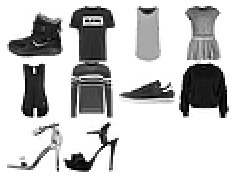

In [8]:
# Plot inline first 10 images from training set as a grid
plt.figure(figsize = (4,4))
example_images = X_train[:10]

plot_images(example_images, images_per_row = 4)
plt.show()

##1. Explained Variance vs Principal Components

Text(0, 0.5, '% Of Explained Variance')

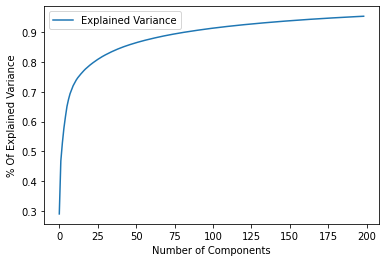

In [9]:
pca_big = PCA(n_components = 200)

pca_big.fit(X_train)

exp_var_data = []
for i in range(1,200):
  exp_var_data.append(sum(pca_big.explained_variance_ratio_[:i]))


exp_var_df = pd.DataFrame(exp_var_data)
exp_var_df.rename_axis("Number of Components")
exp_var_df.columns = ["Explained Variance"]
ax = exp_var_df.plot()
ax.set_xlabel("Number of Components")
ax.set_ylabel("% Of Explained Variance")

##2. Principal Component Plots

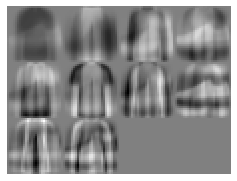

In [10]:
components = pca_big.components_[:10]
plt.figure(figsize = (4,4))
plot_images(components, images_per_row = 4)
plt.show()

These images are the first ten principal components. Within each picture, the brightness is the preserved variance for each individual pixel, or attribute in the PC vector.

##3. 95% Variance

In [11]:
pca_95 = PCA()
pca_95.fit(X_test)
cumsum = np.cumsum(pca_95.explained_variance_ratio_)
d_95 = np.argmax(cumsum >= 0.95) + 1

print("Number of components: ",d_95)

Number of components:  183


In [12]:
pca_95 = PCA(n_components=d_95)
X_reduced = pca_95.fit_transform(X_train)
X_recovered = pca_95.inverse_transform(X_reduced)

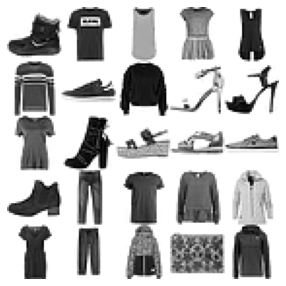

In [13]:
plt.figure(figsize = (5,5))
plot_images(X_train[:25], images_per_row = 5)
plt.show()

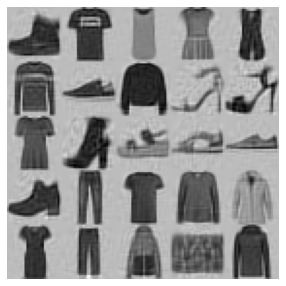

In [14]:
plt.figure(figsize = (5,5))
plot_images(X_recovered[:25], images_per_row = 5)
plt.show()

##4. 90% Variance

In [15]:
pca_90 = PCA()
pca_90.fit(X_test)
cumsum = np.cumsum(pca_90.explained_variance_ratio_)
d_90 = np.argmax(cumsum >= 0.90) + 1

print("Number of components: ",d_90)

Number of components:  83


In [16]:
pca_90 = PCA(n_components=d_90)
X_reduced = pca_90.fit_transform(X_train)
X_recovered = pca_90.inverse_transform(X_reduced)

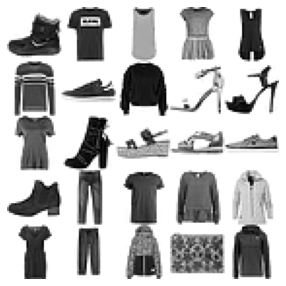

In [17]:
plt.figure(figsize = (5,5))
plot_images(X_train[:25], images_per_row = 5)
plt.show()

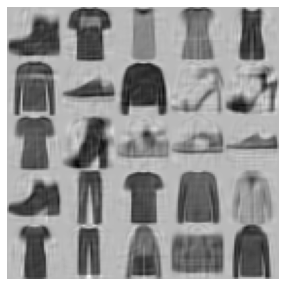

In [18]:
plt.figure(figsize = (5,5))
plot_images(X_recovered[:25], images_per_row = 5)
plt.show()

##5. 75% Variance

In [22]:
pca_75 = PCA()
pca_75.fit(X_test)
cumsum = np.cumsum(pca_75.explained_variance_ratio_)
d_75 = np.argmax(cumsum >= 0.75) + 1

print("Number of components: ",d_75)

Number of components:  14


In [23]:
pca_75 = PCA(n_components=d_75)
X_reduced = pca_75.fit_transform(X_train)
X_recovered = pca_75.inverse_transform(X_reduced)

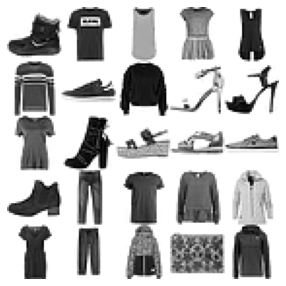

In [24]:
plt.figure(figsize = (5,5))
plot_images(X_train[:25], images_per_row = 5)
plt.show()

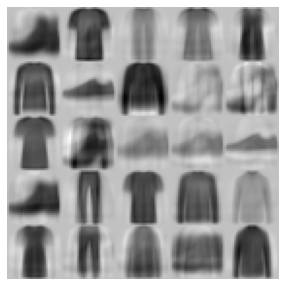

In [25]:
plt.figure(figsize = (5,5))
plot_images(X_recovered[:25], images_per_row = 5)
plt.show()